# Import библиотек

In [84]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Загрузка данных на Google Drive

In [85]:
uploaded = files.upload()

Saving cars_moldova_no_dup.csv to cars_moldova_no_dup (5).csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [86]:
df = pd.read_csv('/content/cars_moldova_no_dup.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# EDA - Разведывательный анализ данных.

Цель разведывательного анализа данных - попытка предварительного понимания того, с чем вы имеете дело. Например, результатами анализа могут быть удаление аномалий, заполнение (удаление) пропусков, визуализация данных, выделение признаков или получение (или преобразование) новых признаков, удаление некоторых шумов, помех или других нерегулярных значений.


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [88]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


## Анализ числовых признаков 

Статистика по числовым данным

In [89]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,41007.000000,4.100700e+04,41007.000000,4.100700e+04
mean,2007.976175,4.567353e+05,1853.856732,9.727109e+03
std,8.241487,4.451897e+06,700.364532,5.043926e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,8.750000e+04,1500.000000,3.500000e+03
50%,2009.000000,1.680000e+05,1800.000000,6.600000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.215000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


Создаём гистограммы

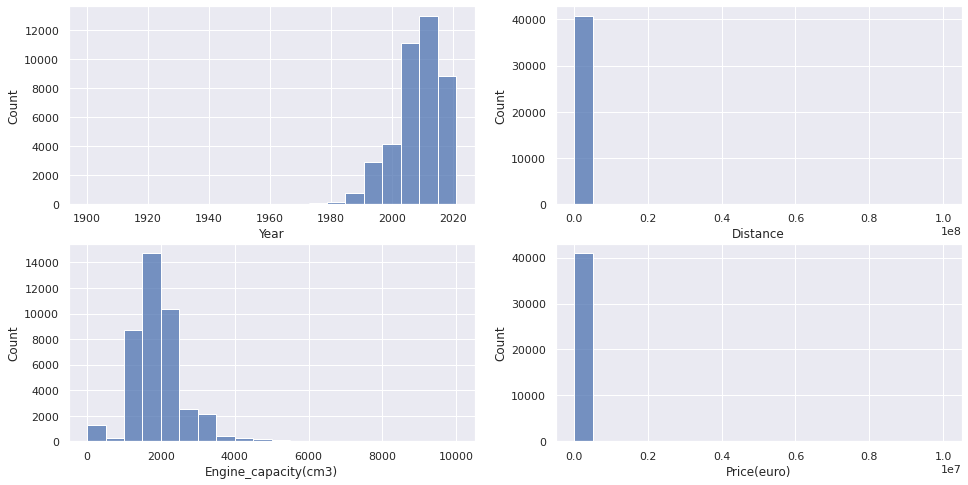

In [90]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

График рассеяния, созданный с помощью метода .plot()**Текст, выделенный полужирным шрифтом**

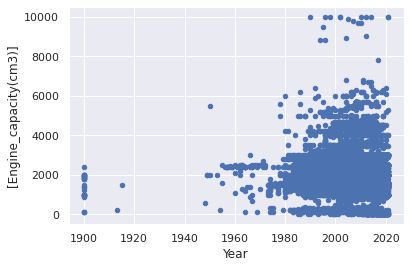

In [91]:
df.plot.scatter(x="Year",y=["Engine_capacity(cm3)"])
plt.show()

Рассмотрел зависимость от вида авто

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


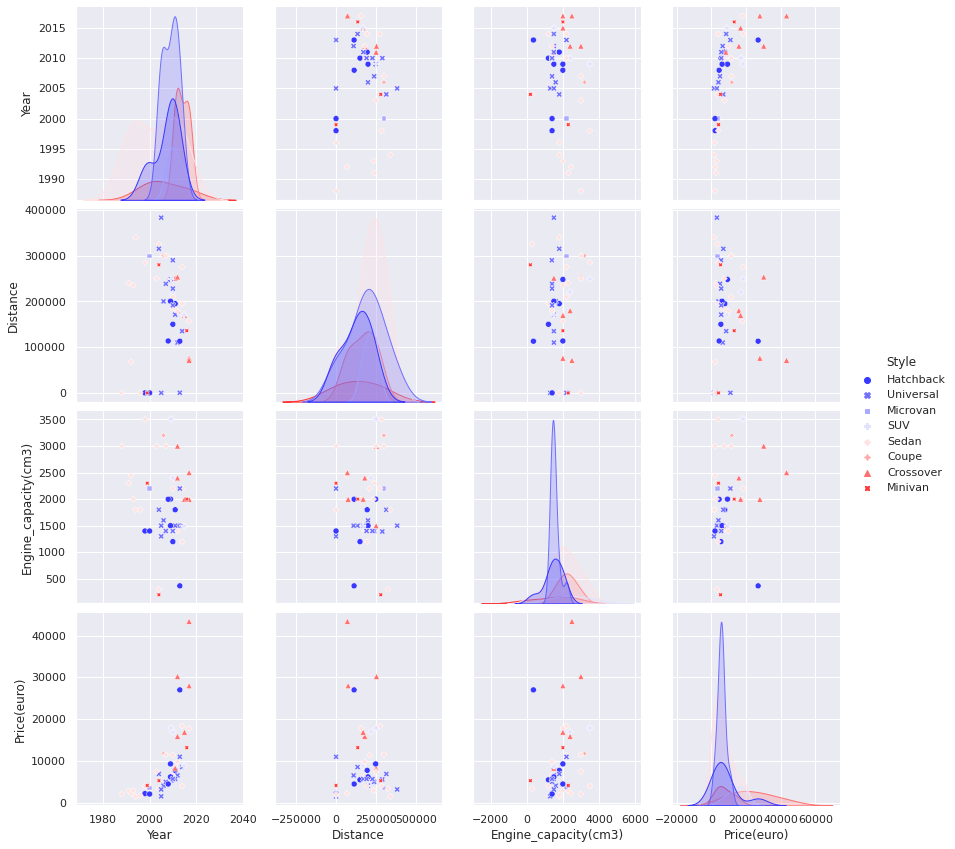

In [92]:

sns.pairplot(data = df[:50], 
             hue = "Style",
             markers = True,
             palette = 'bwr',
             size = 3);

Так же рассмотрел с параметром Transmission

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


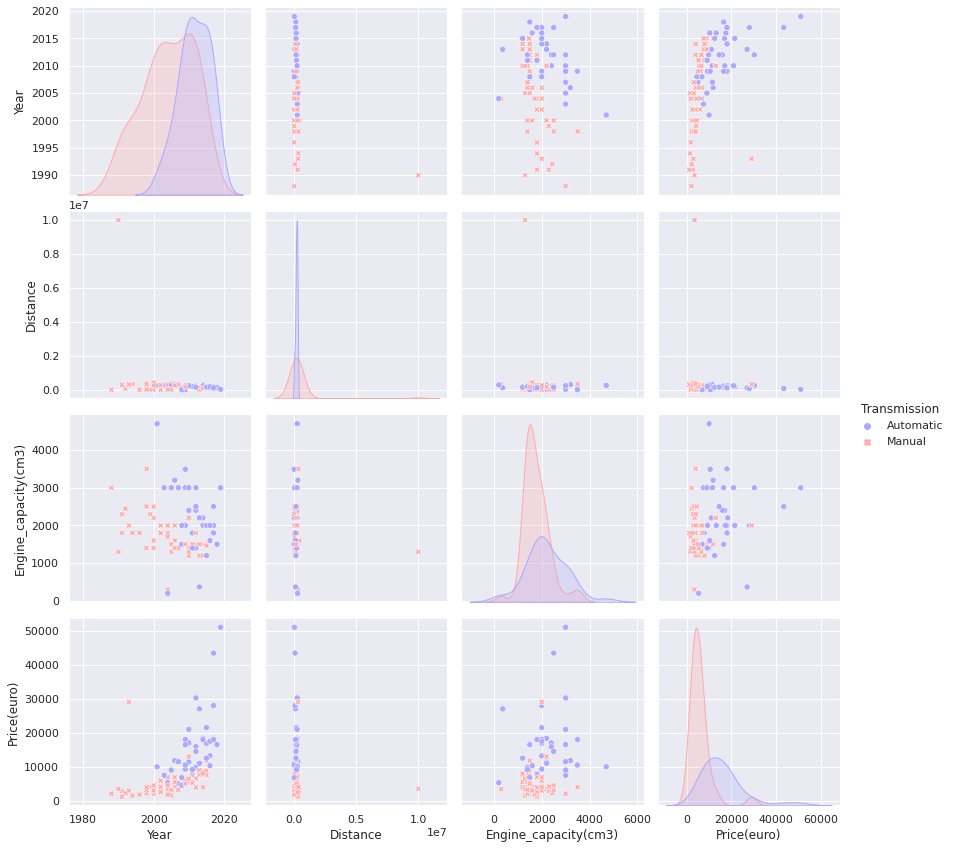

In [93]:
sns.pairplot(data = df[:100], 
             hue = "Transmission",
             markers = True,
             palette = 'bwr',
             size = 3);

**Добавил в модель дополнительные признаки на основе имеющихся**

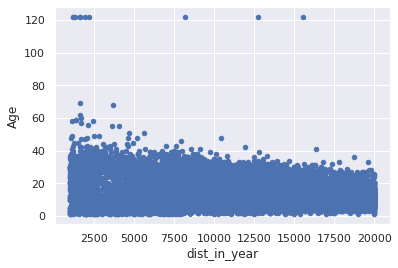

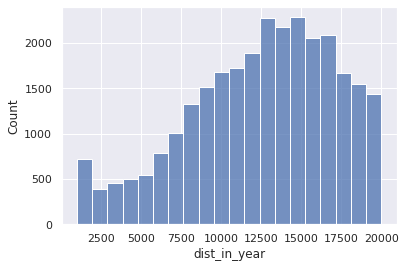

In [94]:
df['Age'] = 2022 - df.Year

df['dist_in_year'] = df.Distance/df.Age
question_km_year = df[df.dist_in_year > 20e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.dist_in_year < 1000]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)


df.plot.scatter(x="dist_in_year",y="Age")

plt.show()
sns.histplot(data=df,
            x='dist_in_year', bins = 20);

**Дорогие и редкие....Дешевые и популярные**

In [95]:
counts = df.Model.value_counts()
question_year = df[(df["Price(euro)"] > 1000)  & (counts[counts<100])    ]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)
df.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,dist_in_year
28014,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
28015,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
28016,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
28017,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0,6,8333.333333
28018,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0,16,18750.000000


In [96]:
counts = df.Model.value_counts()
# здравый смысл
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)


question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)



question_price = df[(df["Price(euro)"] < 1e5) & (counts[counts>100])  ]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)
df.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,dist_in_year
27492,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
27493,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
27494,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
27495,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0,6,8333.333333
27496,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0,16,18750.000000


**Выполнил предварительную обработку данных. Сохранил результаты разных методов предварительной обработки в разные файлы**

In [97]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

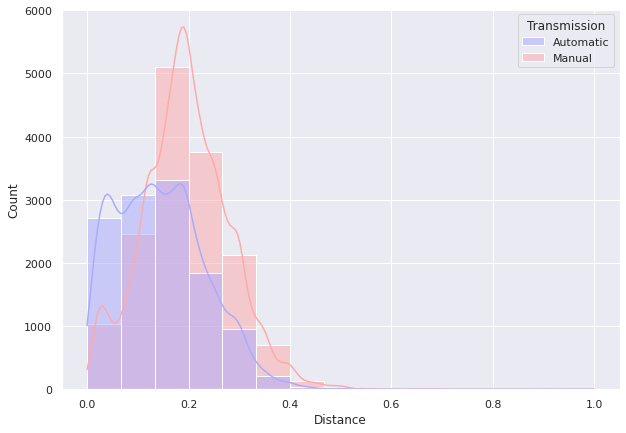

In [98]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

  **Стандартизация данных**

In [99]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

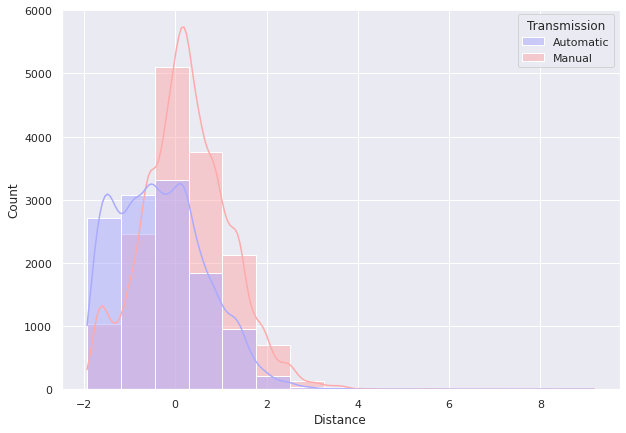

In [100]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

**Степенное преобразование**

In [101]:
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

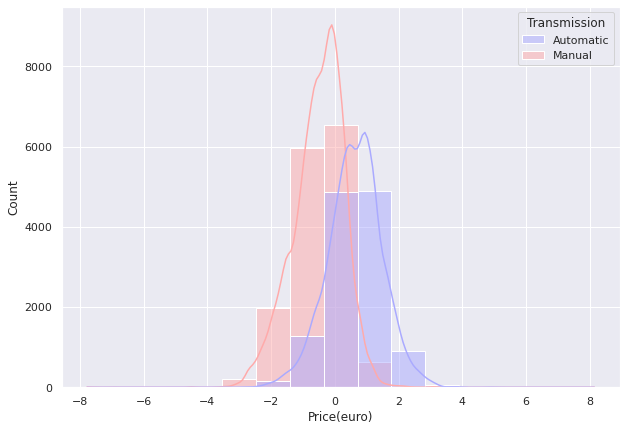

In [102]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')

**Сохранение файла**

In [103]:
df.to_csv('/content/cars_moldova_clean.csv',index=False)


#### Ordinal / One-Hot Encoding

In [104]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

In [106]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27497 entries, 0 to 27496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  27497 non-null  int8   
 1   Model                 27497 non-null  int16  
 2   Year                  27497 non-null  int64  
 3   Style                 27497 non-null  int8   
 4   Distance              27497 non-null  float64
 5   Engine_capacity(cm3)  27497 non-null  float64
 6   Fuel_type             27497 non-null  int8   
 7   Transmission          27497 non-null  int8   
 8   Price(euro)           27497 non-null  float64
 9   Age                   27497 non-null  int64  
 10  dist_in_year          27497 non-null  float64
dtypes: float64(4), int16(1), int64(2), int8(4)
memory usage: 1.4 MB


In [107]:
df_se.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,dist_in_year
0,73,533,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727
1,60,357,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000
2,60,417,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000
3,55,135,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000
4,49,720,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636


In [108]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,dist_in_year,Make_ARO,Make_Abarth,Make_Acura,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
27492,2016,88000.0,1800.0,1,11500.0,6,14666.666667,0,0,0,...,0,0,1,0,0,0,0,0,1,0
27493,2002,225000.0,1800.0,0,4400.0,20,11250.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27494,2015,89000.0,1500.0,0,7000.0,7,12714.285714,0,0,0,...,0,0,0,1,1,0,0,0,0,0
27495,2016,50000.0,1950.0,1,29500.0,6,8333.333333,0,0,0,...,0,0,1,0,1,0,0,0,0,0
27496,2006,300000.0,1500.0,0,4000.0,16,18750.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [109]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27497 entries, 0 to 27496
Columns: 875 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: float64(4), int64(3), uint8(868)
memory usage: 24.2 MB


**Сохранение**

In [110]:
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)